# K-means and PCA for handwritten digits clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## Importing the dataset

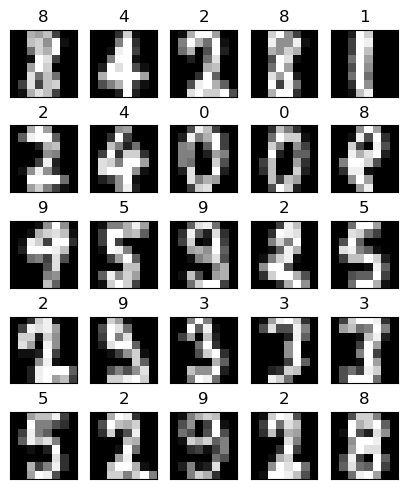

In [2]:
digits = load_digits()
fig, axs = plt.subplots(5, 5, figsize=(5,6))
idxs = np.random.choice(digits.data.shape[0], 25)

for i, idx in enumerate(idxs):
    ax = axs[i//5,i%5]
    ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    ax.imshow(digits.images[idx], cmap="gray")
    ax.set_title(digits.target[idx])
    
plt.show()

## Applying PCA for dimensionality reduction

### Centering the dataset

In [3]:
ctd_data = digits.data - digits.data.mean(axis=0).reshape(1,-1)

### Applying SVD on the dataset matrix

In [4]:
u, s, vh = np.linalg.svd(ctd_data)
n_components = 39
v_reduced = vh.T[:,:n_components]

In [5]:
l = s**2 / ctd_data.shape[0]
print(f"Amount of variance captured: {round(sum(l[:n_components])/sum(l)*100)}%")

Amount of variance captured: 99%


In [6]:
low_dimensional_code = ctd_data @ v_reduced

## Applying K-means on the low dimensional code for clustering

In [16]:
def kmeans(data, n_clusters):
    np.random.seed(0)  # make the method deterministic
    iter = 1
    
    centers = init(data, n_clusters)
    
    while True:
        # Assignment step 
        y_assignments = get_assignments(data, centers)
        
        # Update step
        new_centers = update_centers(data, y_assignments, n_clusters)
        
        # Check for convergence
        if np.allclose(centers, new_centers):
            break
        # update cluster for next iter
        centers = new_centers
        
        print(f'Iteration {iter}')
        iter += 1
    
    return centers, y_assignments

def init(data, n_clusters):
    idx = np.random.choice(data.shape[0], n_clusters)
    return data[idx]

def get_assignments(data, centers):
    


In [17]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.1,
                                                    random_state=0, stratify=digits.target)